In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:

df = pd.read_csv("/home/admn/Downloads/student_scores.csv")
df

NameError: name 'pd' is not defined

In [5]:
pd.__version_

NameError: name 'pd' is not defined

In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
df = pd.read_csv("/home/admn/Downloads/student_scores.csv")
df


NameError: name 'pd' is not defined

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:

df = pd.read_csv("/home/admn/Downloads/student_scores.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: '/home/admn/Downloads/student_scores.csv'

In [10]:

df = pd.read_csv("/home/dslab/Downloads/student_scores.csv")
df

,Hours,Scores
0,2,13
1,2,20
2,3,23
3,5,43
4,6,34
5,7,36
6,8,42
7,3,44
8,7,53
9,9,32


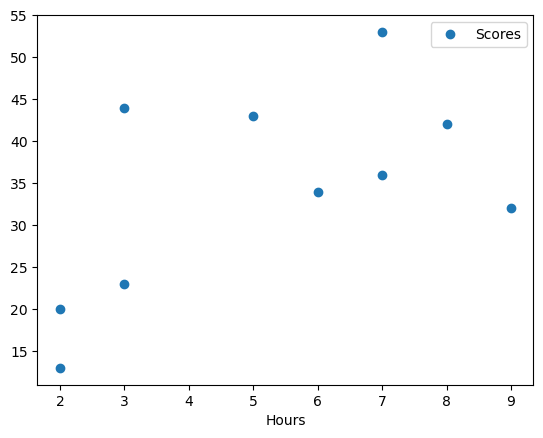

In [11]:
df.plot(x="Hours", y="Scores", style="o")
plt.show()

In [12]:
x_mean = df["Hours"].mean()
y_mean = df["Scores"].mean()
print(x_mean, y_mean)

5.2 34.0


In [13]:
df["x"] = df["Hours"] - x_mean
df["y"] = df["Scores"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df

,Hours,Scores,x,y,x*y,x^2,y^2
0,2,13,-3.2,-21.0,67.2,10.24,441.0
1,2,20,-3.2,-14.0,44.8,10.24,196.0
2,3,23,-2.2,-11.0,24.2,4.84,121.0
3,5,43,-0.2,9.0,-1.8,0.04,81.0
4,6,34,0.8,0.0,0.0,0.64,0.0
5,7,36,1.8,2.0,3.6,3.24,4.0
6,8,42,2.8,8.0,22.4,7.84,64.0
7,3,44,-2.2,10.0,-22.0,4.84,100.0
8,7,53,1.8,19.0,34.2,3.24,361.0
9,9,32,3.8,-2.0,-7.6,14.44,4.0


In [14]:

summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)

165.0 59.6 1372.0


In [15]:

correlation = summation_x_y / (summation_x_squared * summation_y_squared)**0.5
correlation

0.577010556424687

In [16]:
def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg

In [17]:
def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean)**2
        return (std_deviation/len(numbers))**0.5


In [18]:

std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)

2.4413111231467406 11.713240371477058


In [19]:
m = correlation * (std_deviation_y / std_deviation_x)
m

2.7684563758389267

In [20]:
c = df["Scores"].mean() - m * df["Hours"].mean()
c

19.60402684563758

In [21]:
df["y_prediction"] = m * df["Hours"] + c
df


,Hours,Scores,x,y,x*y,x^2,y^2,y_prediction
0,2,13,-3.2,-21.0,67.2,10.24,441.0,25.140940
1,2,20,-3.2,-14.0,44.8,10.24,196.0,25.140940
2,3,23,-2.2,-11.0,24.2,4.84,121.0,27.909396
3,5,43,-0.2,9.0,-1.8,0.04,81.0,33.446309
4,6,34,0.8,0.0,0.0,0.64,0.0,36.214765
5,7,36,1.8,2.0,3.6,3.24,4.0,38.983221
6,8,42,2.8,8.0,22.4,7.84,64.0,41.751678
7,3,44,-2.2,10.0,-22.0,4.84,100.0,27.909396
8,7,53,1.8,19.0,34.2,3.24,361.0,38.983221
9,9,32,3.8,-2.0,-7.6,14.44,4.0,44.520134


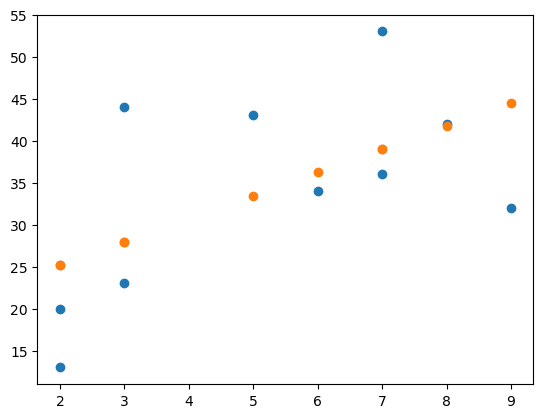

In [22]:
plot1 = plt.scatter(df["Hours"], df["Scores"])
plot2 = plt.scatter(df["Hours"], df["y_prediction"])
plt.show()

In [24]:
sse = pd.sum((y_mean - df.Scores)**2)
print(sse)

AttributeError: module 'pandas' has no attribute 'sum'

In [25]:
import numpy as np

In [30]:
df["cost"]=(df["y_prediction"]-df["Scores"])**2
df

,Hours,Scores,x,y,x*y,x^2,y^2,y_prediction,cost
0,2,13,-3.2,-21.0,67.2,10.24,441.0,25.140940,147.402414
1,2,20,-3.2,-14.0,44.8,10.24,196.0,25.140940,26.429260
2,3,23,-2.2,-11.0,24.2,4.84,121.0,27.909396,24.102169
3,5,43,-0.2,9.0,-1.8,0.04,81.0,33.446309,91.273017
4,6,34,0.8,0.0,0.0,0.64,0.0,36.214765,4.905184
5,7,36,1.8,2.0,3.6,3.24,4.0,38.983221,8.899610
6,8,42,2.8,8.0,22.4,7.84,64.0,41.751678,0.061664
7,3,44,-2.2,10.0,-22.0,4.84,100.0,27.909396,258.907538
8,7,53,1.8,19.0,34.2,3.24,361.0,38.983221,196.470080
9,9,32,3.8,-2.0,-7.6,14.44,4.0,44.520134,156.753761


In [31]:
Totalcost=(df["cost"].sum())/10
totalcost

NameError: name 'totalcost' is not defined

In [32]:
Totalcost


91.52046979865773

In [33]:
df["ssrval"]=(df["y_prediction"]-df["Scores"])**2
df

,Hours,Scores,x,y,x*y,x^2,y^2,y_prediction,cost,ssrval
0,2,13,-3.2,-21.0,67.2,10.24,441.0,25.140940,147.402414,147.402414
1,2,20,-3.2,-14.0,44.8,10.24,196.0,25.140940,26.429260,26.429260
2,3,23,-2.2,-11.0,24.2,4.84,121.0,27.909396,24.102169,24.102169
3,5,43,-0.2,9.0,-1.8,0.04,81.0,33.446309,91.273017,91.273017
4,6,34,0.8,0.0,0.0,0.64,0.0,36.214765,4.905184,4.905184
5,7,36,1.8,2.0,3.6,3.24,4.0,38.983221,8.899610,8.899610
6,8,42,2.8,8.0,22.4,7.84,64.0,41.751678,0.061664,0.061664
7,3,44,-2.2,10.0,-22.0,4.84,100.0,27.909396,258.907538,258.907538
8,7,53,1.8,19.0,34.2,3.24,361.0,38.983221,196.470080,196.470080
9,9,32,3.8,-2.0,-7.6,14.44,4.0,44.520134,156.753761,156.753761


In [34]:
ssr=df["ssrval"].sum()
ssr

915.2046979865772

In [36]:
sse=df["Totalcost"].sum()
sse

KeyError: 'Totalcost'

In [38]:
SSE=df["cost"].sum()
SSE

915.2046979865772

In [40]:
sst=ssr+SSE
sst

1830.4093959731545